In [2]:
#import libraries for data analysis and visualization
import pandas as pd
import matplotlib as plt
import seaborn as sns

#import cleaned dataset

NASA_clean = pd.read_csv('AllData_FixedSub.csv')
NASA_clean.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,cycle_type,start_time,ambient_temperature,Current_load,...,Rct,Corrected_time,current_impedance,ΔT,Δt,temp_gradient,Heat_generated,heat_flux,heat_loss_rate,convective_heat_transfer
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,NaN,...,NaN,0.000,0.2,0.000000,2.532,0.000000,7.300192e-07,-0.000000,-0.000000,0.007290
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,NaN,...,NaN,2.532,0.2,0.011122,2.532,0.004393,8.225488e+00,-0.001889,-0.000008,0.007445
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,NaN,...,NaN,5.500,0.2,0.008915,2.968,0.003004,1.358367e+00,-0.001292,-0.000005,0.007570
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,NaN,...,NaN,8.344,0.2,0.018471,2.844,0.006495,1.295312e+00,-0.002793,-0.000012,0.007830
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,charge,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,24,NaN,...,NaN,11.125,0.2,0.011204,2.781,0.004029,1.270407e+00,-0.001732,-0.000007,0.007988


In [3]:
#get unique column names and variables

for column_headers in NASA_clean.columns:
    print(column_headers)

Voltage_measured
Current_measured
Temperature_measured
Current_charge
Voltage_charge
Time
cycle_type
start_time
ambient_temperature
Current_load
Voltage_load
Capacity
Sense_current
Battery_current
Current_ratio
Battery_impedance
Rectified_Impedance
Re
Rct
Corrected_time
current_impedance
ΔT
Δt
temp_gradient
Heat_generated
heat_flux
heat_loss_rate
convective_heat_transfer


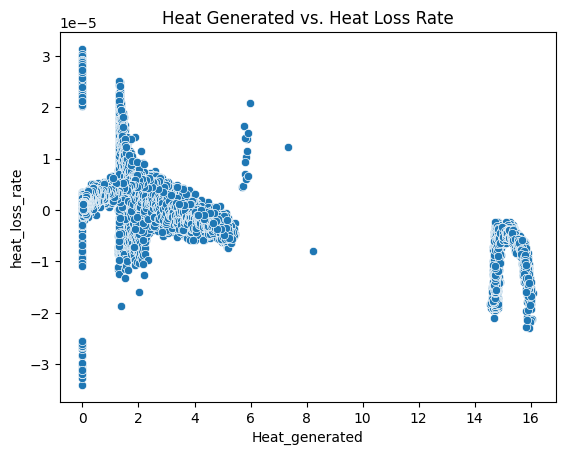

In [5]:
#Plot total heat generated versus heat loss rate (scatterplot)

#In the absense of time data, is there a relationship between total heat generated and heat loss rate?
ax = sns.scatterplot(data=NASA_clean, x='Heat_generated',y='heat_loss_rate').set(title='Heat Generated vs. Heat Loss Rate')
plt.pyplot.savefig('heatgen_loss.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

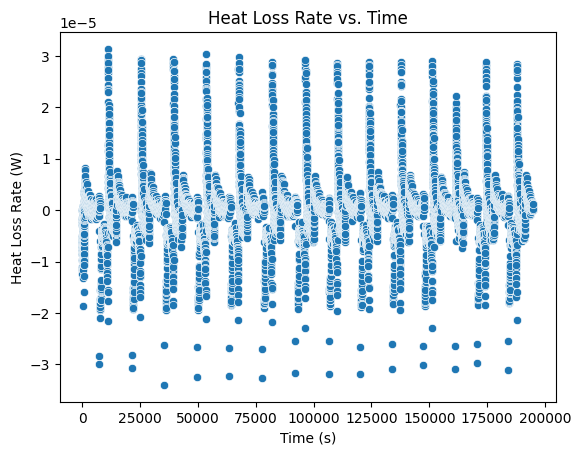

In [6]:
#Plot heat loss rate versus corrected time (scatterplot)

#How does battery energy waste change over time?
ax = sns.scatterplot(data=NASA_clean, x='Corrected_time',y='heat_loss_rate').set(xlabel='Time (s)',ylabel='Heat Loss Rate (W)',title='Heat Loss Rate vs. Time')
plt.pyplot.savefig('HeatLossRateVsTime.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

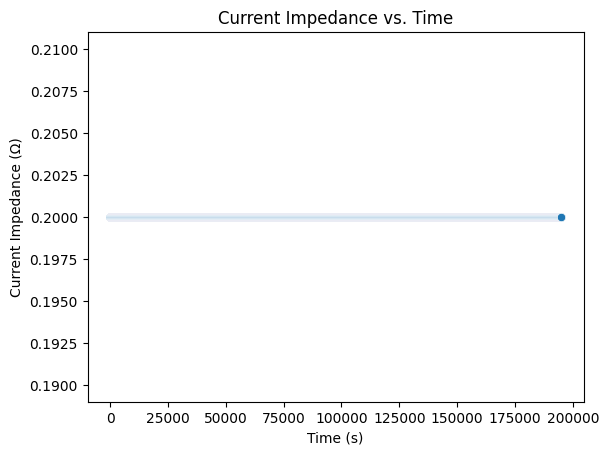

In [7]:
#Plot current impedance versus corrected time (scatterplot)

#How does current impedance change over time?
ax = sns.scatterplot(data=NASA_clean, x='Corrected_time',y='current_impedance').set(xlabel='Time (s)',ylabel='Current Impedance (Ω)',title='Current Impedance vs. Time')
plt.pyplot.savefig('CurrentImpedanceVsTime.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

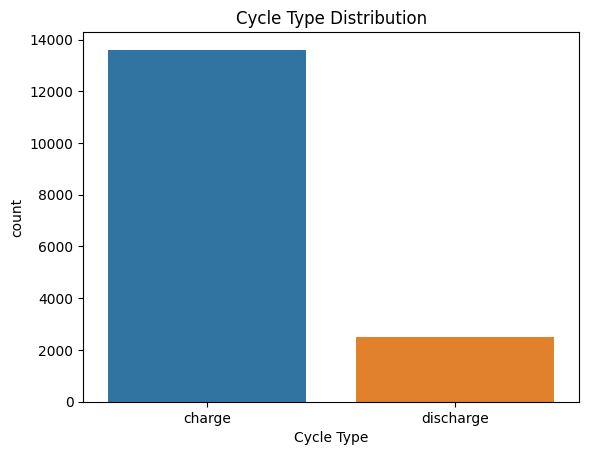

In [8]:
#Plot total distribution of cycle type (number of tests)

ax = sns.countplot(data=NASA_clean, x='cycle_type').set(xlabel='Cycle Type',title='Cycle Type Distribution')
plt.pyplot.savefig('CycleTypeDistribution.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

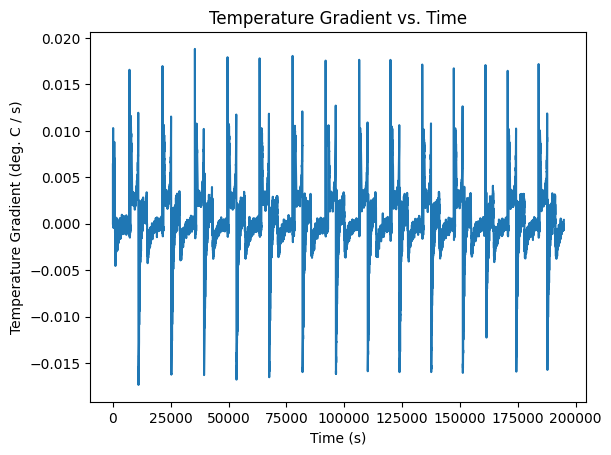

In [9]:
#Plot temperature gradient versus corrected time (lineplot)

ax = sns.lineplot(data=NASA_clean, x='Corrected_time',y='temp_gradient').set(xlabel='Time (s)',ylabel='Temperature Gradient (deg. C / s)',title='Temperature Gradient vs. Time')
plt.pyplot.savefig('TemperatureGradientVsTime.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

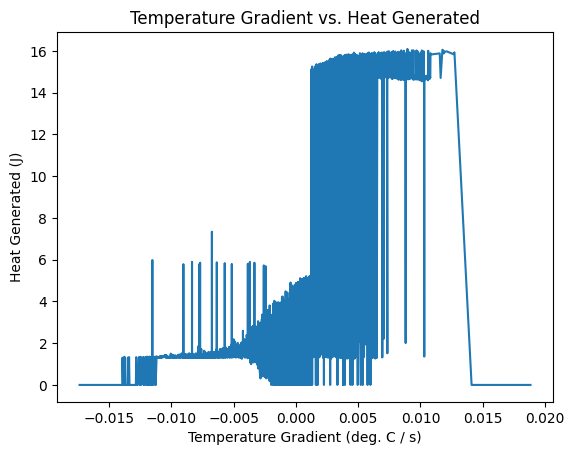

In [10]:
#Plot heat generated versus temperature gradient (lineplot)

ax = sns.lineplot(data=NASA_clean, x='temp_gradient',y='Heat_generated').set(xlabel='Temperature Gradient (deg. C / s)',ylabel='Heat Generated (J)',title='Temperature Gradient vs. Heat Generated')
plt.pyplot.savefig('TemperatureGradientVsHeatGenerated.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

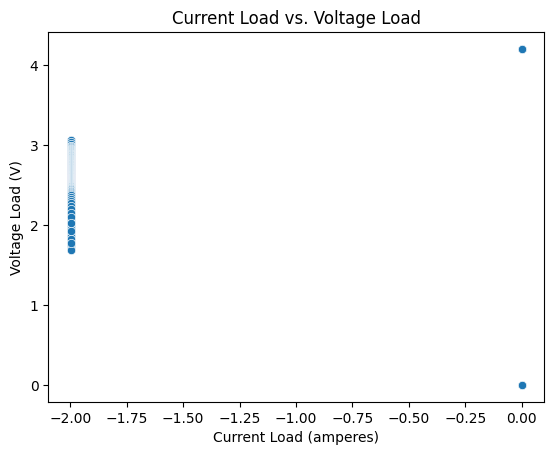

In [11]:
#Plot current load vs. ratio (scatterplot)

ax = sns.scatterplot(data=NASA_clean, x='Current_load',y='Voltage_load').set(xlabel='Current Load (amperes)',ylabel='Voltage Load (V)',title='Current Load vs. Voltage Load')
plt.pyplot.savefig('CurrentLoadVsVL.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

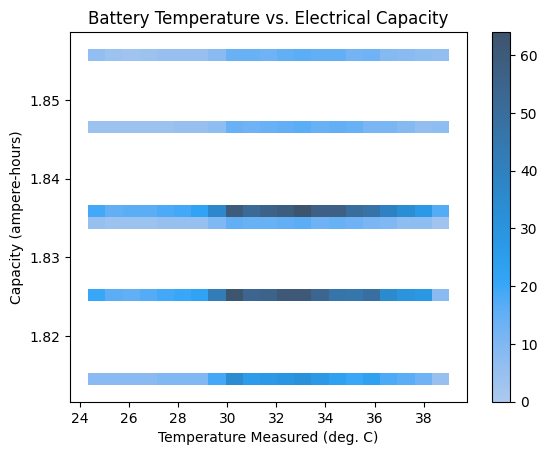

In [12]:
#Plot temp. measured versus total battery capacity (histplot)

ax = sns.histplot(data=NASA_clean, x='Temperature_measured',y='Capacity',cbar=True).set(xlabel='Temperature Measured (deg. C)',ylabel='Capacity (ampere-hours)',title='Battery Temperature vs. Electrical Capacity')
plt.pyplot.savefig('TempVsCapacity.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

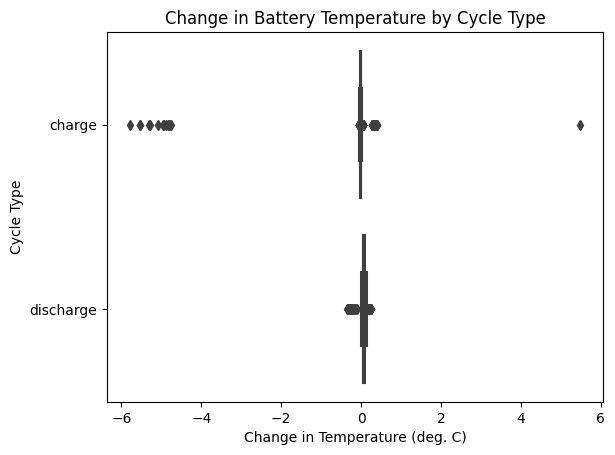

In [13]:
#Plot change in temperature by battery class (boxplot)

ax = sns.boxplot(data=NASA_clean, x='ΔT',y='cycle_type').set(xlabel='Change in Temperature (deg. C)',ylabel='Cycle Type',title='Change in Battery Temperature by Cycle Type')
plt.pyplot.savefig('DeltaTempClass.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

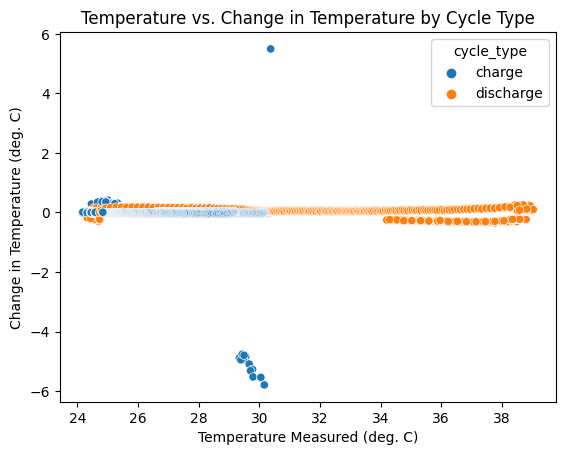

In [14]:
#Plot change in temperature by total temperature by battery class (scatterplot)

ax = sns.scatterplot(data=NASA_clean, x='Temperature_measured',y='ΔT', hue='cycle_type').set(xlabel='Temperature Measured (deg. C)',ylabel='Change in Temperature (deg. C)',title='Temperature vs. Change in Temperature by Cycle Type')
plt.pyplot.savefig('DeltaTempTotTempClass.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)

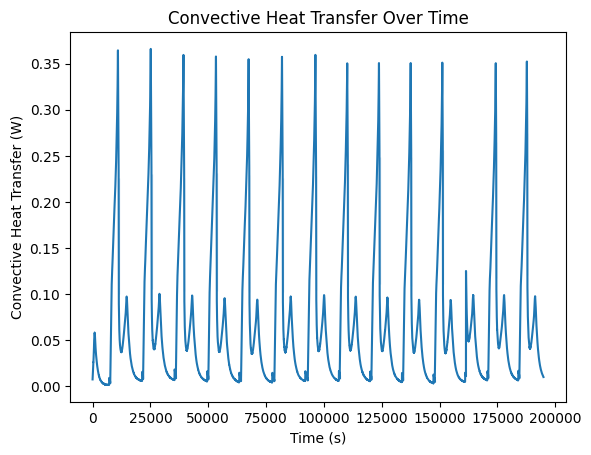

In [15]:
#Plot convective heat tranfer over time (lineplot)

ax = sns.lineplot(data=NASA_clean, x='Corrected_time',y='convective_heat_transfer').set(xlabel='Time (s)',ylabel='Convective Heat Transfer (W)',title='Convective Heat Transfer Over Time')
plt.pyplot.savefig('CHTVsTime.png',bbox_inches='tight', dpi=600, facecolor='white',transparent=True)